# Vacuum Logger
Communicating with TPG362

In [1]:
import pyvisa
import csv
import pprint
import time
import datetime
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd
import tkinter as tk

In [3]:
rm = pyvisa.ResourceManager()
usb = rm.list_resources()
print(usb)

('ASRL3::INSTR',)


In [28]:
rm.close()

VisaIOError: VI_ERROR_INV_OBJECT (-1073807346): The given session or object reference is invalid.

measurement time（mtime）を設定する

In [13]:
# rm.close()

rm = pyvisa.ResourceManager()
usb = rm.list_resources()
# print(usb)

gauge = usb[1]
inst = rm.open_resource(gauge)

d_now = datetime.datetime.now()
t_now = datetime.datetime.now().time()

header = ['time', 'gauge 1 state', 'gauge 1 vacuum [Pa]', 'gauge 2 state', 'gauge 2 vacuum [Pa]']

# measurement time [s]
mtime = 10

rate = 0.1  # unit [s]
rtime = int(mtime/rate)

date = d_now.strftime('%Y%m%d_%H%M%S')
name = 'VacuumLog_' + date + '.csv'
path = "C:\\Users\\Sakelab\\Desktop\\temp\\2408-cell\\vaccum\\data" + name

with open(path, mode='x', newline='') as f:
    writer = csv.writer(f)
    writer.writerow([d_now])
    writer.writerow(header)
    inst.write('COM,0')
    inst.read()
    inst.write('\x05')
    for i in range(0, rtime, 1):
        s = inst.read()
        if (s=='\x15\r\n') or (s=='0001\r\n') or (s=='\x06\r\n') or (s=='0000\r\n'):
            continue
        else:
            t_now = datetime.datetime.now().time()
            t = t_now.strftime('%H:%M:%S.%f')
            ss = s[:-2].split(',')
            ss.insert(0, t)
            writer.writerow(ss)
        time.sleep(rate)

# rm.close()

# with open(path) as f:
#     print(f.read())

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

Text(0, 0.5, 'Vacuum [Pa]')

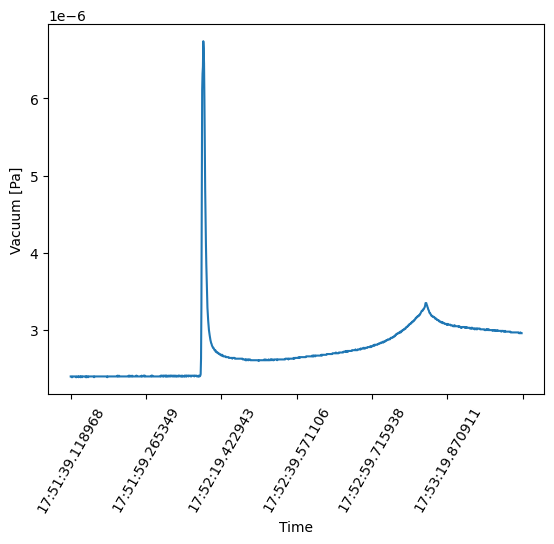

In [ ]:
df = pd.read_csv(path, header=1)

# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
df.plot(x='time', y='gauge 1 vacuum [Pa]', legend=False)
plt.xticks(rotation=60)
plt.xlabel('Time')
plt.ylabel('Vacuum [Pa]')
# plt.ylim(10e-7, 10e-4)
# plt.yscale('log')
# plt.grid(which='major', color='lightgray', linestyle='-')
# plt.grid(which='minor', color='lightgray', linestyle='-')

<Axes: xlabel='time'>

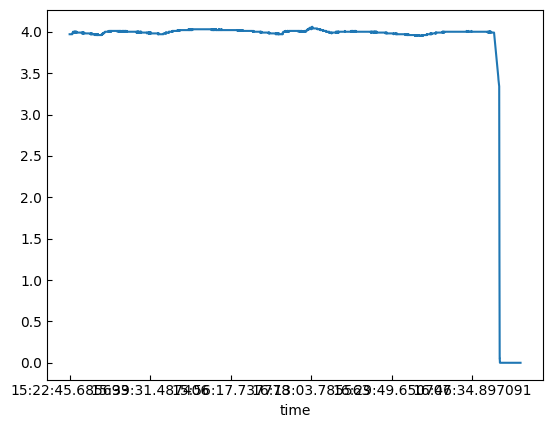

In [83]:
path1 = 'C:\\Users\\sakel\\Documents\\python\\vacuum\\data\\'
name1 = 'VacuumLog_20240805_152243.csv'
path2 = path1 + name1

df = pd.read_csv(path2, header=1)
df.plot(x='time', y='gauge 1 vacuum [Pa]', legend=False)

In [7]:
rm.close()

In [12]:
# for sputtering
rm = pyvisa.ResourceManager()
usb = rm.list_resources()
gauge = usb[0]
inst = rm.open_resource(gauge)

d_now = datetime.datetime.now()
t_now = datetime.datetime.now().time()

header = ['time', 'gauge 1 state', 'gauge 1 vacuum [Pa]', 'gauge 2 state', 'gauge 2 vacuum [Pa]']

date = d_now.strftime('%Y%m%d_%H%M%S')
name = 'VacuumLog_' + date + '.csv'
path = "C:\\Users\\Sakelab\\Desktop\\temp\\2408-cell\\vaccum\\data" + name

root = tk.Tk()

def f_close(event):
    rm.close()
    root.destroy()

frame = tk.Frame(root)

# set close button setting
button = tk.Button(frame, text='Close')
button.grid(row=0, column=10, padx=5, sticky='e')
button.bind('<Button-1>', f_close)

canvas = tk.Canvas(frame, bg='#ffffff', width=800, height=400)
canvas.grid(row=1, columnspan=11, rowspan=1)

frame.pack()
canvas.create_text(400, 200, text='', font=('Gothic', 100), tags='mytext')

def check_Vac():
    s = inst.read()
    if (s=='\x15\r\n') or (s=='0001\r\n') or (s=='\x06\r\n') or (s=='0000\r\n'):
        x = '-'
    else:
        t_now = datetime.datetime.now().time()
        t = t_now.strftime('%H:%M:%S.%f')
        ss = s[:-2].split(',')
        ss.insert(0, t)
        writer.writerow(ss)
        x = ss[2][1:5] + ss[2][7:11]
        s = x + ' Pa'
    canvas.itemconfig('mytext', text=s)
    root.after(500, check_Vac)

with open(path, mode='x', newline='') as f:
    writer = csv.writer(f)
    writer.writerow([d_now])
    writer.writerow(header)
    inst.write('COM,1')
    inst.read()
    inst.write('\x05')
    check_Vac()
    root.mainloop()

# rm.close()



# with open(path) as f:
#     print(f.read())

VisaIOError: VI_ERROR_IO (-1073807298): Could not perform operation because of I/O error.

In [ ]:
        if i%(rtime/100)==0:
            df = pd.read_csv(path, header=1)
            plt.rcParams['xtick.direction'] = 'in'
            plt.rcParams['ytick.direction'] = 'in'
            df.plot(x='time', y='gauge 1 vacuum [Pa]', legend=False)
            plt.xticks(rotation=60)
            plt.xlabel('Time')
            plt.ylabel('Vacuum [Pa]')

In [136]:
rm.close()

In [694]:
d_now = datetime.datetime.now()
# t_now = datetime.datetime.now().time()
date = d_now.strftime('%Y%m%d_%H%M%S')
print(date)

20240802_142130


In [720]:
inst.write('PRX')
# inst.write('COM,0')
# inst.write('*IDN?') 


InvalidSession: Invalid session handle. The resource might be closed.

In [203]:
for i in range(1000):
    print(inst.read())

InvalidSession: Invalid session handle. The resource might be closed.

In [722]:
inst.read()


InvalidSession: Invalid session handle. The resource might be closed.

In [662]:
inst.write('\x05')

3

In [565]:
s = '0,+3.8800E+00,5,+0.0000E+00\r\n'
ss1 = s.split(',')
ss = s[:-2].split(',')
print(ss)
print(ss1)

['0', '+3.8800E+00', '5', '+0.0000E+00']
['0', '+3.8800E+00', '5', '+0.0000E+00\r\n']


In [644]:
f.close

<function TextIOWrapper.close()>

In [ ]:
s = '0,+3.8800E+00,5,+0.0000E+00\r\n'
ss1 = s.split(',')
ss = s[:-2].split(',')
print(ss)
print(ss1)

['0', '+3.8800E+00', '5', '+0.0000E+00']
['0', '+3.8800E+00', '5', '+0.0000E+00\r\n']


In [111]:
import datetime
from decimal import Decimal, ROUND_HALF_UP

t0 = datetime.datetime(year=2024, month=7, day=29, hour=11, minute=6)

now = datetime.datetime.now()

td = now - t0

rd = 800  # kBq
l = 8.0872e-7

rd_now = rd*np.exp(-l*td.total_seconds())
rd_now_str = str(Decimal(str(rd_now)).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP))

print(rd_now_str)
print(str(rd_now))

458.43
458.4284928560845
